## Zadatak
#### Za date podatke naci linearnu funkciju ("fit"-ovati pravu) koja ih najbolje predstavlja

## Podaci
#### Podaci su dati kao dva niza vrednosti (X i Y). X predstavlja niz vrednosti nezavisne promenljive dok Y predstavlja niz vrednosti zavisne promenljive.
Primer:

X - Kilometraza predjena automobilom, Y - Cena goriva za predjeni put 

In [156]:
# generisanje N nasumicnih podataka sa nasumicnim dodatkom na svaki y_i od najvise var za primer predjenog puta i cene goriva
function generateData(N::Int64, var::Int64)
    X = []; Y = []
    potrosnja = 6.6
    cenaGoriva = 220

    for i in 1:N
        x = rand(100:600)
        push!(X, x)
        push!(Y, round(Int, x/100*potrosnja*cenaGoriva + rand(-var:var)))
    end

    return X, Y
end;

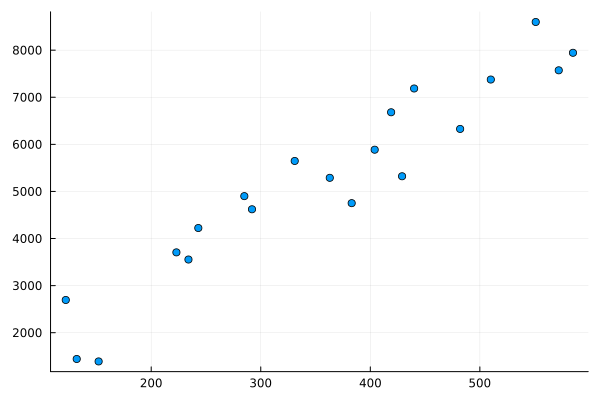

In [163]:
# Prikaz podataka
using Plots

N = 20;                         # Broj podataka
X, Y = generateData(N, 1000);    # Generisanje podataka

scatter(X, Y, label="")

## Fitovanje prave

Fitovana prava se moze predstaviti funkcijom $y = kx + n$. Nas zadatak je da odredimo koeficijente $k$ i $n$ tako da se prava najbolje poklapa sa podacima (kao na grafiku iznad).

Ako nase podatke prestavimo kao skup tacaka gde je i-ta tacka $(x_i, y_i)$, tada se moze reci da je 
$$y_i = kx_i + n + \varepsilon _i$$
gde je $\epsilon_i$ odstupanje i-te tacke od prave date koeficijentima $k$ i $n$.

Kako odrediti koeficijente?


## Metod najmanjih kvadrata

Ovaj metod racuna koeficijente $k$ i $n$ takve da je sume kvadrata odstupanja svih tacaka od prave minimalna.
$$\sum _{i=1}^{n}{\varepsilon}_{i}^{\,2}=\sum _{i=1}^{n}(y_{i} - kx_{i} - n)^{2}$$

Razvijanjem ovih izraza dobiju se sledece formule za koeficijente [[1]](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)
$$ k = \frac {\sum _{i=1}^{n}(x_{i}- \bar{x})(y_{i}- \bar{y})}{\sum _{i=1}^{n}(x_{i}-\bar{x})^2} $$
$$ n = \bar{y}- k\bar{x} $$
gde su $\bar{x}$ i $\bar{y}$ proseci vrednosti $x_i$ i $y_i$, respektivno


k = 13.40393784248831, n = 462.25182752618


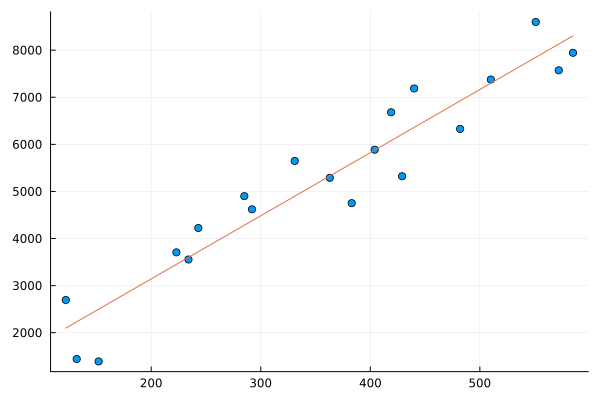

In [164]:
# Racunanje proseka
avgX, avgY = 0, 0;
for i in 1:N
    avgX += X[i]; avgY += Y[i];
end
avgX /= N; avgY /= N;

# Racunanje suma
top = 0; bot = 0;
for i in 1:N
    top += (X[i] - avgX) * (Y[i] - avgY);
    bot += (X[i] - avgX)^2;
end

# Racunanje koeficijenata
k = top/bot;
n = avgY - k * avgX;

println("k = ", k, ", n = ", n);
# Prikaz fitovanje linije
yy = k.*X .+ n
scatter(X, Y, label="");
plot!(X, yy, label="")


## Drugi nacin

Ako kombinujemo jednacine za svaku tacku i predstavimo matricno dobijemo

$$
\begin{bmatrix}
y_1\\
\vdots\\
y_n
\end{bmatrix}
=

\begin{bmatrix}
x_1 & 1\\
\vdots & \vdots\\
x_n & 1
\end{bmatrix}
\begin{bmatrix}
k\\
n
\end{bmatrix}
$$

U Juliji operator __\\__ na osnovu operanada bira algoritam koji ce primeniti. U ovom slucaju ce odrediti koeficijente $k$ i $n$ metodom najmanjih kvadrata (primenom QR faktorizacije) [[2]](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#Base.:\\-Tuple{AbstractMatrix,%20AbstractVecOrMat})



In [168]:
# Konverzija podataka u Int i postavljanje u matrice 
x = [ones(Int, N) convert.(Int, X)]
y = convert.(Int, Y)

# Izracunavanje koeficijenata
n_novi, k_novi = x \ y

# Uporedjivanje dobijenih koeficijenata sa prethodnim
println("novi k  = ", k_novi, ", novi n = ", n_novi);
println("stari k = ", k, ", stari n = ", n);

novi k  = 13.403937842488311, novi n = 462.2518275261801
stari k = 13.40393784248831, stari n = 462.25182752618


Dobijeni su isti koeficijenti